In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
raw_benchmark_results = pd.read_csv('../benchmarks/2020-12-07-priority-large.csv')

raw_benchmark_results.sample(5)

,generation_config_i,input_strategy,input_length_1,input_change_strength,input_chunkiness,input_distribution,regen_i,repetition_i,diff_program,mpi_procs,micros_input,micros_precompute,micros_until_len,micros_edit_script
342,2,addremove,4999,0.333333,0.0,zipf,0,0,sequential,NaN,550,0,56041,1520
377,25,addremove,6803,0.666667,0.0,zipf,0,1,mpi_priority,8.0,1149,0,309058,0
251,69,addremove,12599,1.000000,0.0,zipf,0,1,mpi_priority,8.0,2082,0,2260348,0
129,58,remove,10800,1.000000,0.0,zipf,0,1,sequential,NaN,588,0,998319,6463
288,8,remove,4999,1.000000,0.0,zipf,0,0,mpi_priority,8.0,449,0,177238,0


In [3]:
indexed_benchmark_results = raw_benchmark_results.set_index(['generation_config_i', 'regen_i', 'diff_program', 'repetition_i'])
indexed_benchmark_results

input_strategy  \
generation_config_i regen_i diff_program repetition_i                  
12                  0       mpi_priority 0                 addremove   
                                         1                 addremove   
                            sequential   0                 addremove   
                                         1                 addremove   
7                   0       mpi_priority 0                       add   
...                                                              ...   
37                  0       sequential   1                       add   
96                  0       mpi_priority 0               independent   
                                         1               independent   
                            sequential   0               independent   
                                         1               independent   

                                                       input_length_1  \
generation_config_i regen_i diff_program repetition_i                   
12                  0       mpi_priority 0                       5832   
                                         1                       5832   
                            sequential   0                       5832   
                                         1                       5832   
7                   0       mpi_priority 0                       4999   
...                                                               ...   
37                  0       sequential   1                       7937   
96                  0       mpi_priority 0                      20000   
                                         1                      20000   
                            sequential   0                      20000   
                                         1                      20000   

                                                       input_change_strength  \
generation_config_i regen_i diff_program repetition_i                          
12                  0       mpi_priority 0                          0.333333   
                                         1                          0.333333   
                            sequential   0                          0.333333   
                                         1                          0.333333   
7                   0       mpi_priority 0                          1.000000   
...                                                                      ...   
37                  0       sequential   1                          1.000000   
96                  0       mpi_priority 0                          1.000000   
                                         1                          1.000000   
                            sequential   0                          1.000000   
                                         1                          1.000000   

                                                       input_chunkiness  \
generation_config_i regen_i diff_program repetition_i                     
12                  0       mpi_priority 0                          0.0   
                                         1                          0.0   
                            sequential   0                          0.0   
                                         1                          0.0   
7                   0       mpi_priority 0                          0.0   
...                                                                 ...   
37                  0       sequential   1                          0.0   
96                  0       mpi_priority 0                          0.0   
                                         1                          0.0   
                            sequential   0                          0.0   
                                         1                          0.0   

                                                      input_distribution  \
generation_config_i regen_i diff_program repetition_i                     

In [4]:
unique_regen_i_values = sorted(np.unique(indexed_benchmark_results.index.get_level_values('regen_i').values))
assert(unique_regen_i_values == [0])

In [5]:
indexed_benchmark_results.xs('mpi_priority', level='diff_program')

input_strategy  input_length_1  \
generation_config_i regen_i repetition_i                                  
12                  0       0                 addremove            5832   
                            1                 addremove            5832   
7                   0       0                       add            4999   
                            1                       add            4999   
15                  0       0                 addremove            5832   
...                                                 ...             ...   
52                  0       1                 addremove           10800   
37                  0       0                       add            7937   
                            1                       add            7937   
96                  0       0               independent           20000   
                            1               independent           20000   

                                          input_change_strength  \
generation_config_i regen_i repetition_i                          
12                  0       0                          0.333333   
                            1                          0.333333   
7                   0       0                          1.000000   
                            1                          1.000000   
15                  0       0                          0.666667   
...                                                         ...   
52                  0       1                          0.333333   
37                  0       0                          1.000000   
                            1                          1.000000   
96                  0       0                          1.000000   
                            1                          1.000000   

                                          input_chunkiness input_distribution  \
generation_config_i regen_i repetition_i                                        
12                  0       0                          0.0               zipf   
                            1                          0.0               zipf   
7                   0       0                          0.0               zipf   
                            1                          0.0               zipf   
15                  0       0                          0.0               zipf   
...                                                    ...                ...   
52                  0       1                          0.0               zipf   
37                  0       0                          0.0               zipf   
                            1                          0.0               zipf   
96                  0       0                          0.0               zipf   
                            1                          0.0               zipf   

                                          mpi_procs  micros_input  \
generation_config_i regen_i repetition_i                            
12                  0       0                   8.0          1046   
                            1                   8.0           976   
7                   0       0                   8.0          1280   
                            1                   8.0           816   
15                  0       0                   8.0           985   
...                                             ...           ...   
52                  0       1                   8.0          1944   
37                  0       0                   8.0          1964   
                            1                   8.0          1964   
96                  0       0                   8.0          3439   
                            1                   8.0          3398   

                                          micros_precompute  micros_until_len  \
generation_config_i regen_i repetition_i                                        
12                  0       0                             0            183461  

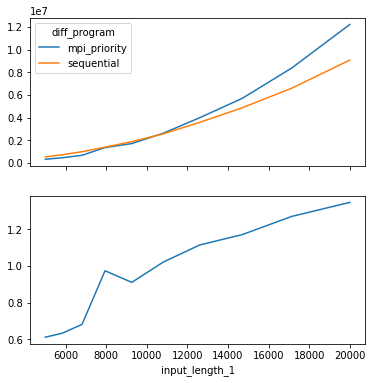

In [6]:
fig, ax = plt.subplots(2, 1, figsize=(6, 6), sharex=True)

temp = indexed_benchmark_results.groupby(['generation_config_i', 'diff_program']).min()
temp = temp[temp.index.get_level_values('diff_program').isin(['mpi_priority', 'sequential'])]
temp = temp[temp['input_strategy'] == 'independent']
temp = temp.set_index('input_length_1', append=True)
temp = temp.unstack('diff_program')['micros_until_len']
temp = temp.droplevel('generation_config_i')
temp = temp.sort_index()

temp.plot(ax=ax[0]);
(temp.mpi_priority / temp.sequential).plot(ax=ax[1]);

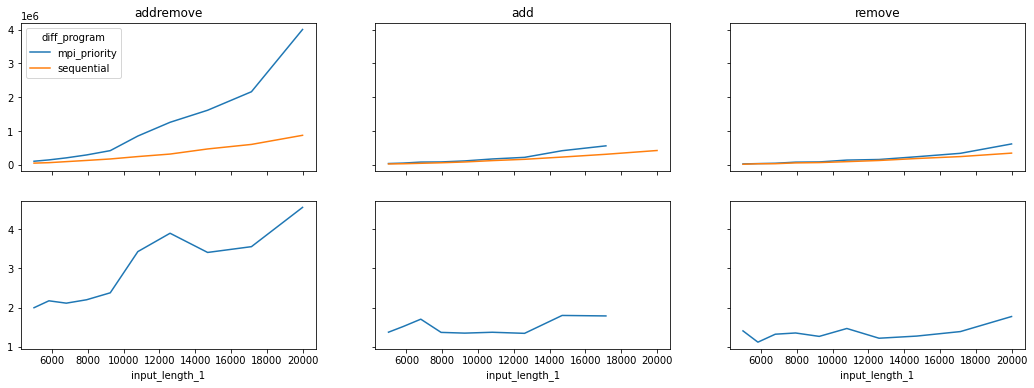

In [7]:
fig, ax = plt.subplots(2, 3, figsize=(18, 6), sharex=True, sharey='row')
for input_strategy_i, input_strategy in enumerate(['addremove', 'add', 'remove']):
    temp = indexed_benchmark_results.groupby(['generation_config_i', 'diff_program']).min()
    temp = temp[(temp['input_strategy'] == input_strategy) & (temp['input_change_strength'] == 1/3) & (temp['input_chunkiness'] == 0)]
    temp = temp[temp.index.get_level_values('diff_program').isin(['mpi_priority', 'sequential'])]
    temp = temp.set_index('input_length_1', append=True)
    temp = temp.unstack('diff_program')['micros_until_len']
    temp = temp.droplevel('generation_config_i')
    temp = temp.sort_index()

    temp.plot(ax=ax[0][input_strategy_i], legend=(input_strategy_i == 0), title=input_strategy);
    (temp.mpi_priority / temp.sequential).plot(ax=ax[1][input_strategy_i]);

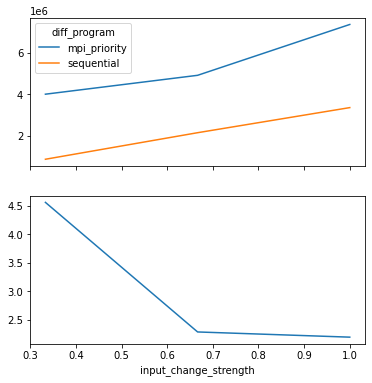

In [8]:
fig, ax = plt.subplots(2, 1, figsize=(6, 6), sharex=True)

temp = indexed_benchmark_results.groupby(['generation_config_i', 'diff_program']).min()
temp = temp[(temp['input_strategy'] == 'addremove') & (temp['input_length_1'] == temp['input_length_1'].max()) & (temp['input_chunkiness'] == 0)]
temp = temp[temp.index.get_level_values('diff_program').isin(['mpi_priority', 'sequential'])]
temp = temp.set_index('input_change_strength', append=True)
temp = temp.unstack('diff_program')['micros_until_len']
temp = temp.droplevel('generation_config_i')
temp = temp.sort_index()

temp.plot(ax=ax[0]);
(temp.mpi_priority / temp.sequential).plot(ax=ax[1]);

0.395
0.44
0.3


,input_strategy,input_length_1,input_change_strength,input_chunkiness,input_distribution,mpi_procs,micros_input,micros_precompute,micros_until_len,micros_edit_script
0,add,4999,0.666667,0.0,zipf,8.0,1154,0,115600,0
1,add,4999,0.666667,0.0,zipf,8.0,1154,0,115600,0
2,remove,4999,0.666667,0.0,zipf,8.0,578,0,77232,0
3,remove,4999,0.666667,0.0,zipf,8.0,578,0,77232,0
4,independent,4999,1.000000,0.0,zipf,8.0,862,0,329797,0
...,...,...,...,...,...,...,...,...,...,...
74,remove,17144,1.000000,0.0,zipf,8.0,921,0,1709924,0
75,remove,20000,0.666667,0.0,zipf,8.0,2280,0,1246255,0
76,remove,20000,0.666667,0.0,zipf,8.0,2280,0,1246255,0
77,remove,20000,1.000000,0.0,zipf,8.0,1757,0,3017310,0


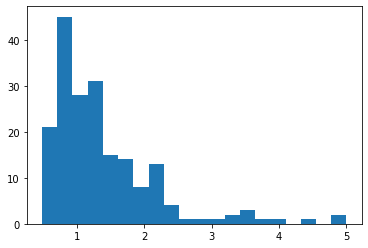

In [9]:
temp = indexed_benchmark_results['micros_until_len'].unstack('diff_program')
print((temp.mpi_priority < temp.sequential).mean())
print((temp.mpi_priority < 1.1 * temp.sequential).mean())
print((1.1 * temp.mpi_priority < temp.sequential).mean())

hist_values = temp.mpi_priority / temp.sequential
hist_values = hist_values.clip(upper=5)
plt.hist(hist_values, bins=20);

beaten_rows = []
for generation_config_i in temp[temp.mpi_priority < temp.sequential].index.get_level_values('generation_config_i'):
    beaten_rows.append(indexed_benchmark_results.xs(generation_config_i, level='generation_config_i').iloc[0].to_dict())
pd.DataFrame(beaten_rows)